<H1>Dataset Loading and Interaction Extraction</h1>

In [36]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [37]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [38]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [39]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


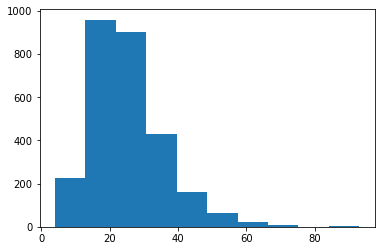

In [40]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [41]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [42]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 YYKREgk
1 jnDt
2 LhxWpf
3 oVxnOu
4 XvxBLKTN
5 ntWtbimJI
6 CbxmuRhu
7 MrRZJo
8 jAkK
9 FOv


In [43]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA unbRGlU unbRGlU is a sentence'

In [44]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 Serum albumin
1 IgM
2 Myoglobin
3 Von Willebrand Factor
4 Elastin
5 Factor XIII
6 FOXP2
7 NCAM
8 Protein S
9 Fibrin


In [45]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [46]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [47]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [48]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Cadherin collagen types II Gamma globulin and III Oxytocin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Protein C PROTEINB collagen types II Ferritin and III Muscarinic acetylcholine receptor in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for GroEL  Arp2/3 collagen types II PROTEINB and III Serum albumin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for IgM F-spondin collagen types II Cadherin and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study describes the distrib


The ability of GroEL  and PROTEINA proteins to interact directly with the PROTEINB Tubulin the general transcription factor required for initiating the assembly of transcription complexes, was investigated.

The ability of Oxytocin and PROTEINA proteins to interact directly with the C3-convertase PROTEINB the general transcription factor required for initiating the assembly of transcription complexes, was investigated.

The ability of Ependymin and GroEL  proteins to interact directly with the PROTEINA PROTEINB the general transcription factor required for initiating the assembly of transcription complexes, was investigated.

Using co-immunoprecipitation and protein-protein association assays, we show that both PROTEINA and PROTEINB bind specifically and stably to Nebulin analysis demonstrates that both the basic region and leucine zipper domains of Serum albumin and Scramblase are necessary and sufficient for stable association with FOXP3

Using co-immunoprecipitation and protein-pro

Interactions of the Fibronectin protein with itself and other members of the CFTR family, including Spectrin PROTEINA PROTEINB and C-myc were explored with a yeast two-hybrid system.

Interactions of the Ependymin protein with itself and other members of the Myoglobin family, including Hemoglobin PROTEINA Albumins and PROTEINB were explored with a yeast two-hybrid system.

Interactions of the Factor XIII protein with itself and other members of the C-myc family, including Von Willebrand Factor Arp2/3 PROTEINA and PROTEINB were explored with a yeast two-hybrid system.

PROTEINA also interacted with PROTEINB and Cadherin and with the dominant inhibitors IgD and GroEL 

PROTEINA also interacted with Nebulin and PROTEINB and with the dominant inhibitors Rhodopsin and Cadherin

PROTEINA also interacted with Fibrin and Actin and with the dominant inhibitors PROTEINB and Gamma globulin

PROTEINA also interacted with Sodium channels and Calcium channels and with the dominant inhibitors C-react


These antibodies specifically immunoprecipitate PROTEINA in complex with PROTEINB in all tissues tested and can be used to immunoaffinity isolate progesterone receptor complexes from chicken oviduct cytosol.

Cloning of the complete coding region for human PROTEINA using the two hybrid system and expression of PROTEINB in E. coli.

cDNA clones encoding a human PROTEINA PROTEINB from a Burkitt lymphoma cell line, BJAB, express a 90 to 110 kDa polypeptide in COS7 cells that binds C-myc specifically.

cDNA clones encoding a human PROTEINA Rhodopsin from a Burkitt lymphoma cell line, BJAB, express a 90 to 110 kDa polypeptide in COS7 cells that binds PROTEINB specifically.

cDNA clones encoding a human Serum albumin PROTEINA from a Burkitt lymphoma cell line, BJAB, express a 90 to 110 kDa polypeptide in COS7 cells that binds PROTEINB specifically.

The predicted amino acid sequence of PROTEINA is 60% identical and 73% similar to mouse PROTEINB F-spondin Scramblase expressed in an C1-inhibi


Under these conditions, a ternary complex of IgE PROTEINA and PROTEINB was observed.

In contrast, in the absence of PROTEINA coexpression of PROTEINB and Myosin resulted in an overall decrease in the Beta globulin kinase activity.

In contrast, in the absence of PROTEINA coexpression of Nicotinic acetylcholine receptor and PROTEINB resulted in an overall decrease in the Actin kinase activity.

In contrast, in the absence of PROTEINA coexpression of C3-convertase and Rhodopsin resulted in an overall decrease in the PROTEINB kinase activity.

In contrast, in the absence of Tubulin coexpression of PROTEINA and PROTEINB resulted in an overall decrease in the IgM kinase activity.

In contrast, in the absence of Fibronectin coexpression of PROTEINA and Alpha globulin resulted in an overall decrease in the PROTEINB kinase activity.

In contrast, in the absence of Tubulin coexpression of C1-inhibitor and PROTEINA resulted in an overall decrease in the PROTEINB kinase activity.

In addition, 

Further studies on the interaction of FOXP3 with molecules in the endoplasmic reticulum revealed that Insulin associates with the PROTEINA Protein C and PROTEINB and that Tau expression is Keratin and tapasin-dependent.

Further studies on the interaction of Protein Z-related protease inhibitor with molecules in the endoplasmic reticulum revealed that Ferritin associates with the PROTEINA IgM and Glucose transporter and that PROTEINB expression is Nicotinic acetylcholine receptor and tapasin-dependent.

Further studies on the interaction of Scramblase with molecules in the endoplasmic reticulum revealed that IgM associates with the PROTEINA Ferritin and Histones and that P53 expression is PROTEINB and tapasin-dependent.

Further studies on the interaction of Factor VIII with molecules in the endoplasmic reticulum revealed that Nicotinic acetylcholine receptor associates with the FOXP2 PROTEINA and PROTEINB and that Integrin expression is Sodium channels and tapasin-dependent.

Further 

Adherens junction proteins Hemoglobin PROTEINA Nebulin Calcium channels Gamma globulin and PROTEINB and the proliferation marker Nicotinic acetylcholine receptor were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins Hemoglobin PROTEINA Collagen FOXP2 Myosin and Spectrin and the proliferation marker PROTEINB were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins Serum Amyloid P Component Keratin PROTEINA PROTEINB Protein C and IgA and the proliferation marker Hemoglobin were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins Nebulin Fibronectin PROTEINA Cadherin PROTEINB and Selectin and the proliferation marker Estrogen receptor were localized in the cultures by fluorescence microscopy, and in vitro wound healing was compared.

Adherens junction proteins Beta globulin Se

Characterization of PROTEINA and poly-L-proline binding sites of Acanthamoeba PROTEINB with monoclonal antibodies and by mutagenesis.

For example, PROTEINA with a deletion of the eight C-terminal residues has many of the physical properties of a molten globule, yet remarkably still binds to PROTEINB

The results provide two independent lines of evidence about the binding sites for PROTEINA and poly-L-proline on the PROTEINB molecule.

Characterization of a mutant PROTEINA with reduced PROTEINB capacity: effects in vitro and in vivo.

Characterization of PROTEINA truncates that inhibit PROTEINB depolymerization by severing activity of Histones and Beta globulin

Characterization of PROTEINA truncates that inhibit Alpha globulin depolymerization by severing activity of PROTEINB and Spectrin

Characterization of PROTEINA truncates that inhibit Arp2/3 depolymerization by severing activity of Protein C and PROTEINB

Characterization of Hemoglobin truncates that inhibit PROTEINA depolymeriz


Fluorographic analysis showed that the specific activity of soluble PROTEINA was two to three times that of its particulate form and that soluble Ferritin PROTEINB Titin and Cadherin were transported at similar rates in slow component b of axonal flow.

Fluorographic analysis showed that the specific activity of soluble PROTEINA was two to three times that of its particulate form and that soluble Serum Amyloid P Component FOXP2 PROTEINB and Alpha globulin were transported at similar rates in slow component b of axonal flow.

Fluorographic analysis showed that the specific activity of soluble PROTEINA was two to three times that of its particulate form and that soluble Oxidoreductases Protein S Protein S and PROTEINB were transported at similar rates in slow component b of axonal flow.

Fluorographic analysis showed that the specific activity of soluble Elastin was two to three times that of its particulate form and that soluble PROTEINA PROTEINB Selectin and Rhodopsin were transported

We find that heterozygotes for Fibrin Scramblase or PROTEINA Beta globulin null alleles have complex myofibrillar defects, whereas FOXP2 PROTEINB double heterozygotes have nearly normal myofibrils.

We find that heterozygotes for C1-inhibitor Integrin or Protein Z PROTEINA null alleles have complex myofibrillar defects, whereas PROTEINB Nebulin double heterozygotes have nearly normal myofibrils.

We find that heterozygotes for Rhodopsin Arp2/3 or Protein S PROTEINA null alleles have complex myofibrillar defects, whereas Factor VIII PROTEINB double heterozygotes have nearly normal myofibrils.

We find that heterozygotes for C1-inhibitor Hemoglobin or Hydrolases Serum albumin null alleles have complex myofibrillar defects, whereas PROTEINA PROTEINB double heterozygotes have nearly normal myofibrils.

Germline mutations in several members of these families, PROTEINA PROTEINB Myoglobin and Myoglobin but not Spectrin are responsible for hereditary non-polyposis colorectal cancer.

Germline 


In this study we demonstrate that Dystrphin PROTEINA and Alpha globulin PROTEINB synthesized in young (5 hr) conjugating Tetrahymena are deposited into micronuclei in acetylated forms.

In this study we demonstrate that Ependymin C1-inhibitor and PROTEINA PROTEINB synthesized in young (5 hr) conjugating Tetrahymena are deposited into micronuclei in acetylated forms.

In three of the cell lines with PROTEINA mutations, complexes of PROTEINB with IgG and IgG were detectable.

In three of the cell lines with PROTEINA mutations, complexes of Oxidoreductases with PROTEINB and Scramblase were detectable.

In three of the cell lines with PROTEINA mutations, complexes of Gamma globulin with Insulin and PROTEINB were detectable.

In three of the cell lines with MyoD mutations, complexes of PROTEINA with PROTEINB and Tau were detectable.

In three of the cell lines with Tau mutations, complexes of PROTEINA with Rhodopsin and PROTEINB were detectable.

In three of the cell lines with Insulin mut


N-formyl peptide chemoattractants in neutrophils stimulate the formation of phosphatidylinositol-4,5-bisphosphate (PIP2), a reservoir for second messenger molecules and regulator of Selectin assembly through its association with the Oxytocin PROTEINA and PROTEINB

No significant changes in glomerular PROTEINA PROTEINB Nebulin or total Selectin expression occurred at any time point during disease development.

No significant changes in glomerular PROTEINA Tau PROTEINB or total Cadherin expression occurred at any time point during disease development.

No significant changes in glomerular PROTEINA Tubulin C1-inhibitor or total PROTEINB expression occurred at any time point during disease development.

No significant changes in glomerular Keratin PROTEINA PROTEINB or total Arp2/3 expression occurred at any time point during disease development.

No significant changes in glomerular GroEL  PROTEINA Hydrolases or total PROTEINB expression occurred at any time point during disease developme


We observed that four replication proteins, C1-inhibitor Titin PROTEINA and PROTEINB are necessary for the localization of Fibronectin Potassium channels to prereplicative sites natural infection conditions.

We observed that four replication proteins, IgD Glucose transporter PROTEINA and Dystrphin are necessary for the localization of PROTEINB FOXP3 to prereplicative sites natural infection conditions.

We observed that four replication proteins, Serum Amyloid P Component Ependymin PROTEINA and FOXP2 are necessary for the localization of IgM PROTEINB to prereplicative sites natural infection conditions.

We observed that four replication proteins, C-reactive protein Actin MyoD and PROTEINA are necessary for the localization of PROTEINB Ependymin to prereplicative sites natural infection conditions.

We observed that four replication proteins, Oxytocin Gamma globulin CFTR and PROTEINA are necessary for the localization of Pikachurin PROTEINB to prereplicative sites natural infection c

The neoplastic cells were positive for FOXP3 Actin PROTEINA and IgA but negative for IgE Alpha globulin GroEL  Tau PROTEINB Muscarinic acetylcholine receptor and FOXP3 protein.

The neoplastic cells were positive for IgD Estrogen receptor PROTEINA and Oxidoreductases but negative for Oxidoreductases C3-convertase Cadherin Selectin Tubulin PROTEINB and IgD protein.

The neoplastic cells were positive for PROTEINB Actin PROTEINA and Calcium channels but negative for Collagen F-spondin Hydrolases Alpha globulin Fibrin Fibronectin and PROTEINB protein.

The neoplastic cells were positive for Factor VIII Hydrolases Tau and PROTEINA but negative for PROTEINB Keratin Actin CFTR MyoD Fibrin and Factor VIII protein.

The neoplastic cells were positive for Serum Amyloid P Component P53 Myoglobin and PROTEINA but negative for IgM PROTEINB Beta globulin Scramblase Spectrin Von Willebrand Factor and Serum Amyloid P Component protein.

The neoplastic cells were positive for C-reactive protein Albumi


To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of Von Willebrand Factor PROTEINA Nicotinic acetylcholine receptor the Ependymin PROTEINB Carboxypeptidase and Estrogen receptor and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of Serum albumin PROTEINA Myoglobin the Selectin FOXP3 PROTEINB and Tropomyosin and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of Serum Amyloid P Component PROTEINA Sodium channels the Protein Z-related protease inhibitor Oxidoreductases FOXP2 and PROTEINB and markers of differentiating podocytes in developing human kidneys was investigated by immunohistoche

Using ITP (a substrate for Histones Thrombin and/or ATP gamma S (a substrate for PROTEINA Thrombin we demonstrated that phosphorylation of PROTEINB occurred at the foci within the C-reactive protein network, a result that suggests that Insulin was localized at the foci.

Using ITP (a substrate for Rhodopsin Albumins and/or ATP gamma S (a substrate for PROTEINA Gamma globulin we demonstrated that phosphorylation of Thrombin occurred at the foci within the PROTEINB network, a result that suggests that Hemoglobin was localized at the foci.

Using ITP (a substrate for Protein C Fibronectin and/or ATP gamma S (a substrate for PROTEINA Rhodopsin we demonstrated that phosphorylation of IgD occurred at the foci within the Myosin network, a result that suggests that PROTEINB was localized at the foci.

Using ITP (a substrate for Von Willebrand Factor Ependymin and/or ATP gamma S (a substrate for Oxidoreductases PROTEINA we demonstrated that phosphorylation of PROTEINB occurred at the foci withi


In marked contrast, intracerebroventricular Muscarinic acetylcholine receptor administration was accompanied by the maintenance of high Sodium channels PROTEINA and PROTEINB expression in all these tissues

While PROTEINA maintains or favors energy-dissipating mechanisms PROTEINB Transferases and Serum albumin the latter are markedly depressed in pair-fed rats

While PROTEINA maintains or favors energy-dissipating mechanisms Myosin PROTEINB and Myosin the latter are markedly depressed in pair-fed rats

While PROTEINA maintains or favors energy-dissipating mechanisms Integrin Actin and PROTEINB the latter are markedly depressed in pair-fed rats

While P53 maintains or favors energy-dissipating mechanisms PROTEINA PROTEINB and Alpha globulin the latter are markedly depressed in pair-fed rats

While Actin maintains or favors energy-dissipating mechanisms PROTEINA Ependymin and PROTEINB the latter are markedly depressed in pair-fed rats

While MyoD maintains or favors energy-dissipating m

The addition of GroEL  to in vitro transcription reactions resulted in the stimulation of RNAP holoenzyme activity, but PROTEINA was observed to be more sensitive to Hemoglobin stimulation than PROTEINB

The addition of Integrin to in vitro transcription reactions resulted in the stimulation of RNAP holoenzyme activity, but Alpha globulin was observed to be more sensitive to PROTEINA stimulation than PROTEINB

Although PROTEINA is transcriptionally regulated by the key regulatory device that controls sporulation initiation, the PROTEINB phosphorelay, there is considerable evidence implicating a mechanism of post-translational control that governs the activity and concentration of sigmaH.

Finally, we show that proper localization of SpoIVA required the expression of one or more genes which, like PROTEINA are under the control of the mother cell transcription factor PROTEINB

The PROTEINA regulon includes a penicillin binding protein PROTEINB and a co-transcribed amino acid racemase Thr

In [49]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [50]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [51]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [52]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="word2vecMed"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("wikipedia-pubmed-and-PMC-w2v.bin", binary=True)
            embed_size = 200            
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')


print()
print('word2vecMed')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vecMed')

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


#del embedding_matrix_word2vec

#del embedding_matrix_glove

#del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

word2vecMed

glove

fasttext


<h1>Functional API</h1>

In [53]:

reallyDenseResults = []
denseResults = []
LSTMResults = []
dropoutLSTMResults = []

all_epochs_to_run  = 100
opt = 'adam'
learningRate = 1


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

<h4>word2vecMed</h4>

In [54]:
embedding_matrix = loadEmbeddingMatrix('word2vecMed')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 5443656 word vectors.
total embedded: 5070 common words


In [55]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


reallyDenseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 4000)          804000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 200)           1002

10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 61/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 62/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6017 - accuracy: 0.7108 0s - loss: 0.6015 - ac
Epoch 63/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 64/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 65/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 66/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 67/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6019 - accuracy: 0.7108 0s - loss: 0.6020 - accuracy: 0.71
Epoch 68/100
10394/10394 [==============================] - 16s 2ms/step - loss: 0.6021 - accuracy:

In [56]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          402000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

10394/10394 [==============================] - 5s 529us/step - loss: 0.4602 - accuracy: 0.78595s - loss: 0.4218 - accuracy - ETA: 4s - loss: 0.4 - E - ETA: 2s - loss: 0.4492 - accuracy: 0. - ETA: 2s - loss: 0.4515 - accu - ETA: 2s - loss: 0.4529 - accuracy:  - ETA: 2s - loss: - ETA:  - ETA: 0s - loss: 0.4600 - accuracy: 0.
Epoch 27/100
10394/10394 [==============================] - 5s 528us/step - loss: 0.4572 - accuracy: 0.78615s - loss: 0.4757 - accuracy: 0. - ETA: 4s - loss: 0.4658 - accura - - ETA: 3s - loss: 0.452 - ETA: 2s - - ETA: 1s - ETA: 0s - loss: 0.4544 - accura - ETA: 0s - loss: 0.4568 - accuracy: 
Epoch 28/100
10394/10394 [==============================] - 5s 528us/step - loss: 0.4590 - accuracy: 0.78054s - loss: 0.4519 - accu - ETA: 3s - loss: 0.4502 - accuracy - ETA: 3s - loss: 0.4515 - accuracy:  - ETA: 3s - loss: 0 - ETA: 2s - loss: - ETA: 1s - loss: 0.4558 - accu - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.4565 - accura - ETA: 0s - loss: 0.4596 - ac
Epoch 29/100
10394/10

10394/10394 [==============================] - 5s 526us/step - loss: 0.4321 - accuracy: 0.79584s - loss: 0.4229 - accuracy: 0. - ETA: 4s - loss: 0.4227  - ETA: 3s - loss: 0.4170 - accu - ETA: 3s - loss: 0.421
Epoch 58/100
10394/10394 [==============================] - 5s 526us/step - loss: 0.4272 - accuracy: 0.79524s - loss: 0.4140 - accuracy: 0.80 - - ETA: 2s - loss: 0.4157 - accuracy: 0.80 - ETA: 2s - loss: 0.4158 - accuracy: 0.80 - ETA: 2s - los - ETA: 
Epoch 59/100
10394/10394 [==============================] - 5s 529us/step - loss: 0.4292 - accuracy: 0.79642s - - ETA: 1s - loss: 0.4277  - ETA: 0s - loss: 0.4275 - accuracy: 0. - ETA: 0s - loss: 0.427
Epoch 60/100
10394/10394 [==============================] - 5s 526us/step - loss: 0.4247 - accuracy: 0.79365s - loss: 0.4337 - accuracy: 0. - ETA: 4s - los - ETA: 4s - loss: 0 - ETA: 3s - loss: 0 - ETA: 2s - loss: 0.4170 - accuracy: 0. - ETA: 2s - loss: 0.4184 - accuracy: 0.79 - ETA: 2s - loss: 0.4178  - ETA: 1s - loss: 0.4204  - E
Epo

10394/10394 [==============================] - 6s 529us/step - loss: 0.4049 - accuracy: 0.80435s - loss: 0.3755 - accuracy: 0. - ETA: 5s - loss: 0.4062 - ac - ETA: 4s - loss: 0 - ETA: 4s - loss: 0.3912 - accuracy: 0. - ETA: 3s - loss: 0.3944 - accuracy: 0.80 - ETA: 3s - loss: 0.3 - ETA: 1s - loss: 0.4027 - accu - ETA: 1s - loss: 0.4032 - accuracy: 0.80 - ETA: 1s - loss: 0.4025  - ETA: 0s - loss: 0.4053 - accuracy - ETA: 0s - loss: 0.4046 - 
Epoch 89/100
10394/10394 [==============================] - 5s 528us/step - loss: 0.4056 - accuracy: 0.80573s - l - ETA: 3s - loss: 0.403 - ETA: 2s - loss: 0.4034  - ETA: 1s - loss: 0.407 - ETA: 1s - loss: 0.4079 - ac - ETA: 0s - loss: 0.4104 - accuracy:  - ETA: 0s - loss: 0.410
Epoch 90/100
10394/10394 [==============================] - 5s 528us/step - loss: 0.4009 - accuracy: 0.80854s - loss: 0.4218  - ETA: 4s - loss: 0.4 - ETA: 4s - loss: 0.3962 - accuracy:  - ETA: 3s - loss: 0.3977 - accuracy: 0. - ETA: 3s -
Epoch 91/100
10394/10394 [===========

In [57]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,385,401
Trainable params: 1,385,401
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5600 - accuracy: 0.7166
Epoch 2/100
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4733 - accuracy: 0.7569
Epoch 3/100


10394/10394 [==============================] - 14s 1ms/step - loss: 2.7160e-06 - accuracy: 1.0000
Epoch 67/100
10394/10394 [==============================] - 14s 1ms/step - loss: 2.2694e-06 - accuracy: 1.0000 0s - loss: 2.2680e-06 
Epoch 68/100
10394/10394 [==============================] - 14s 1ms/step - loss: 1.8954e-06 - accuracy: 1.0000
Epoch 69/100
10394/10394 [==============================] - 14s 1ms/step - loss: 1.5854e-06 - accuracy: 1.0000
Epoch 70/100
10394/10394 [==============================] - 14s 1ms/step - loss: 1.3269e-06 - accuracy: 1.0000
Epoch 71/100
10394/10394 [==============================] - 14s 1ms/step - loss: 1.1101e-06 - accuracy: 1.0000 0s - loss: 1.100
Epoch 72/100
10394/10394 [==============================] - 14s 1ms/step - loss: 9.3200e-07 - accuracy: 1.0000
Epoch 73/100
10394/10394 [==============================] - 14s 1ms/step - loss: 7.8132e-07 - accuracy: 1.0000
Epoch 74/100
10394/10394 [==============================] - 14s 1ms/step - loss: 6.56

In [58]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        dropout = 0.3, 
        recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


dropoutLSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 200)           1064400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,385,401
Trainable params: 1,385,401
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5667 - accuracy: 0.7081
Epoch 2/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4957 - accuracy: 0.7441
Epoch 3/100


10394/10394 [==============================] - 15s 1ms/step - loss: 0.0264 - accuracy: 0.9909
Epoch 69/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0248 - accuracy: 0.9907
Epoch 70/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 71/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0238 - accuracy: 0.9916
Epoch 72/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0251 - accuracy: 0.9922 0s - loss: 0.0251 - accuracy: 
Epoch 73/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 74/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 75/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0207 - accuracy: 0.9943
Epoch 76/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0200 - accuracy: 0.9931
Epoch 77/100
10394/

<h4>glove</h4>

In [59]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [60]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


reallyDenseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 4000)          1204000   
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 200)           1002

10394/10394 [==============================] - 17s 2ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 62/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 63/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 64/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 65/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 66/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 67/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 68/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 69/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 70/100
10394/10394 [========================

In [61]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

10394/10394 [==============================] - 6s 577us/step - loss: 0.4017 - accuracy: 0.8099
Epoch 62/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.3997 - accuracy: 0.8076
Epoch 63/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.4007 - accuracy: 0.8092
Epoch 64/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.4048 - accuracy: 0.8068
Epoch 65/100
10394/10394 [==============================] - 6s 576us/step - loss: 0.4039 - accuracy: 0.8104
Epoch 66/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.4032 - accuracy: 0.80582s - loss: 0.390 - ETA: 0s - loss: 0.4
Epoch 67/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.3994 - accuracy: 0.8106
Epoch 68/100
10394/10394 [==============================] - 6s 579us/step - loss: 0.4029 - accuracy: 0.8043
Epoch 69/100
10394/10394 [==============================] - 6s 577us/step - loss: 0.3987 - accuracy: 0.8083
Epo

In [62]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5559 - accuracy: 0.7115
Epoch 2/100
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4770 - accuracy: 0.7573
Epoch 3/100


10394/10394 [==============================] - 15s 1ms/step - loss: 7.7212e-07 - accuracy: 1.0000 1s - l
Epoch 67/100
10394/10394 [==============================] - 15s 1ms/step - loss: 6.4916e-07 - accuracy: 1.0000
Epoch 68/100
10394/10394 [==============================] - 14s 1ms/step - loss: 5.4594e-07 - accuracy: 1.0000
Epoch 69/100
10394/10394 [==============================] - 14s 1ms/step - loss: 4.5997e-07 - accuracy: 1.0000
Epoch 70/100
10394/10394 [==============================] - 15s 1ms/step - loss: 3.8732e-07 - accuracy: 1.0000
Epoch 71/100
10394/10394 [==============================] - 14s 1ms/step - loss: 3.2693e-07 - accuracy: 1.0000 0s - loss: 3.2659e-07 - accuracy: 
Epoch 72/100
10394/10394 [==============================] - 15s 1ms/step - loss: 2.7601e-07 - accuracy: 1.0000 0s - loss: 2.7492e-07 - accuracy: 1.00
Epoch 73/100
10394/10394 [==============================] - 15s 1ms/step - loss: 2.3334e-07 - accuracy: 1.0000
Epoch 74/100
10394/10394 [==================

In [63]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        dropout = 0.3, 
        recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


dropoutLSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5675 - accuracy: 0.7116
Epoch 2/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5020 - accuracy: 0.7447 1s - los
Epo

10394/10394 [==============================] - 15s 1ms/step - loss: 0.0171 - accuracy: 0.9950
Epoch 68/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0163 - accuracy: 0.9955
Epoch 69/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 70/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0156 - accuracy: 0.9953
Epoch 71/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 72/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 73/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 74/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0140 - accuracy: 0.9952
Epoch 75/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0114 - accuracy: 0.9958
Epoch 76/100
10394/10394 [========================

<h4>fasttext</h4>

In [64]:
embedding_matrix = loadEmbeddingMatrix('fasttext')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 999995 word vectors.
total embedded: 4641 common words


In [65]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Dense(4000, activation='sigmoid')(x)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


reallyDenseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 4000)          1204000   
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2000)          8002000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 200)           1002

10394/10394 [==============================] - 17s 2ms/step - loss: 0.6018 - accuracy: 0.7108
Epoch 62/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 63/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 64/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 65/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6024 - accuracy: 0.7108
Epoch 66/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6021 - accuracy: 0.7108
Epoch 67/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 68/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6017 - accuracy: 0.7108
Epoch 69/100
10394/10394 [==============================] - 17s 2ms/step - loss: 0.6019 - accuracy: 0.7108
Epoch 70/100
10394/10394 [========================

In [66]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

10394/10394 [==============================] - 6s 562us/step - loss: 0.4462 - accuracy: 0.7893
Epoch 60/100
10394/10394 [==============================] - 6s 562us/step - loss: 0.4433 - accuracy: 0.7895
Epoch 61/100
10394/10394 [==============================] - 6s 562us/step - loss: 0.4439 - accuracy: 0.7910
Epoch 62/100
10394/10394 [==============================] - 6s 562us/step - loss: 0.4418 - accuracy: 0.7936
Epoch 63/100
10394/10394 [==============================] - 6s 562us/step - loss: 0.4405 - accuracy: 0.7908
Epoch 64/100
10394/10394 [==============================] - 6s 559us/step - loss: 0.4405 - accuracy: 0.7952
Epoch 65/100
10394/10394 [==============================] - 6s 559us/step - loss: 0.4400 - accuracy: 0.7925
Epoch 66/100
10394/10394 [==============================] - 6s 561us/step - loss: 0.4385 - accuracy: 0.7904
Epoch 67/100
10394/10394 [==============================] - 6s 561us/step - loss: 0.4431 - accuracy: 0.7927
Epoch 68/100
10394/10394 [===============

In [67]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5437 - accuracy: 0.7202
Epoch 2/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4637 - accuracy: 0.7599
Epoch 3/100


10394/10394 [==============================] - 15s 1ms/step - loss: 1.6491e-06 - accuracy: 1.0000
Epoch 67/100
10394/10394 [==============================] - 15s 1ms/step - loss: 1.3811e-06 - accuracy: 1.0000
Epoch 68/100
10394/10394 [==============================] - 15s 1ms/step - loss: 1.1579e-06 - accuracy: 1.0000
Epoch 69/100
10394/10394 [==============================] - 15s 1ms/step - loss: 9.7100e-07 - accuracy: 1.0000
Epoch 70/100
10394/10394 [==============================] - 15s 1ms/step - loss: 8.1530e-07 - accuracy: 1.0000
Epoch 71/100
10394/10394 [==============================] - 15s 1ms/step - loss: 6.8494e-07 - accuracy: 1.0000
Epoch 72/100
10394/10394 [==============================] - 15s 1ms/step - loss: 5.7635e-07 - accuracy: 1.0000
Epoch 73/100
10394/10394 [==============================] - 15s 1ms/step - loss: 4.8520e-07 - accuracy: 1.0000
Epoch 74/100
10394/10394 [==============================] - 15s 1ms/step - loss: 4.0908e-07 - accuracy: 1.0000
Epoch 75/100
1

In [68]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        dropout = 0.3, 
        recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


dropoutLSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5561 - accuracy: 0.7156
Epoch 2/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4790 - accuracy: 0.7545
Epoch 3/100


10394/10394 [==============================] - 15s 1ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 69/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 70/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 71/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 72/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 73/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0186 - accuracy: 0.9935
Epoch 74/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0216 - accuracy: 0.9920 1s - loss: 0
Epoch 75/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 76/100
10394/10394 [==============================] - 15s 1ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 77/100
10394/10394 [===========

In [69]:
print("done")

done


In [70]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vecMed train",  "word2vecMed test",
                       "glove train",  "glove test",
                       "fasttext train", "fasttext test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''




results.add_row(["Dense"] + denseResults)

results.add_row(["Really Dense"] + reallyDenseResults)

results.add_row(["LSTM"]+LSTMResults)

results.add_row(["Dropout LSTM"]+dropoutLSTMResults)

print(results)

+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Accuracy   | word2vecMed train  |  word2vecMed test  |    glove train     |     glove test     |   fasttext train   |   fasttext test    |
+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    Dense     | 0.8155666589736938 | 0.6613869667053223 | 0.8225899338722229 | 0.6626712083816528 | 0.8018087148666382 | 0.6207191944122314 |
| Really Dense | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 | 0.7107946872711182 | 0.7324486374855042 |
|     LSTM     |        1.0         | 0.6258561611175537 |        1.0         | 0.6879280805587769 |        1.0         |      0.65625       |
| Dropout LSTM |        1.0         | 0.6571061611175537 |        1.0         | 0.6459760069847107 | 0.9996151328086853 | 0.6515411138534546 |